과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()

In [3]:
#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

- About data : https://www.kaggle.com/uciml/iris

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 결측치 확인하기

In [31]:
np.isnan(X).sum(), np.isnan(y).sum()

(0, 0)

 - 결측치 존재하지 않는다

## 시각화(Boxplot)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

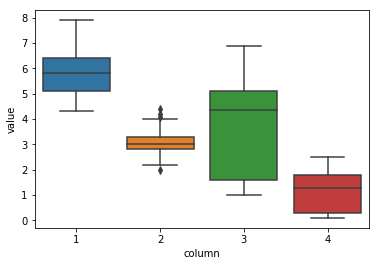

In [52]:
sns.boxplot(x='variable', y= 'value', data = pd.melt(pd.DataFrame(X, columns = ['1','2','3','4'])))
plt.xlabel("column")
plt.show()

 - column 2에서 이상치들이 존재하지만 많은 수 아니므로 고려 X
 - scaling이 필요해 보인다

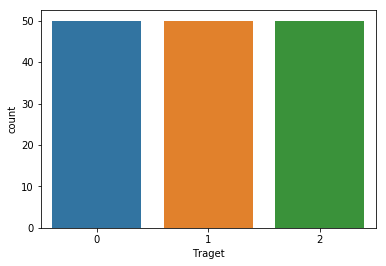

In [75]:
sns.countplot(y)
plt.xlabel('Traget')
plt.show()

 - target은 각각 50개씩이므로 편향되지 않았다

## Split & Scaling

In [76]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
# X_train, X_test

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## KNN

In [81]:
# build KNN model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [82]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)

In [84]:
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9


In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

In [88]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose= 1,
    cv= 3,
    n_jobs= -1
)

In [89]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.1s finished


In [90]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [91]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.958


In [92]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.900


## n_neighbors

In [93]:
#GridSearch의 범위를 1에서 10까지로 지정함
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [94]:
#KNN 알고리즘에 GridSearch를 적용함
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [95]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [96]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 3}


In [97]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.958


In [98]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.900


In [99]:
result_grid = pd.DataFrame(grid_search.cv_results_)

In [100]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000796,0.000398,0.001798,0.000744,1,{'n_neighbors': 1},0.916667,0.875000,1.000000,0.916667,...,0.933333,0.042492,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000806,0.000403,0.001397,0.000493,2,{'n_neighbors': 2},0.916667,0.916667,0.958333,0.958333,...,0.941667,0.020412,5,0.958333,0.989583,0.968750,0.968750,0.979167,0.972917,0.010623
2,0.000394,0.000483,0.001409,0.000505,3,{'n_neighbors': 3},0.916667,0.958333,1.000000,0.958333,...,0.958333,0.026352,1,0.958333,0.979167,0.958333,0.968750,0.958333,0.964583,0.008333
3,0.000605,0.000494,0.001197,0.000399,4,{'n_neighbors': 4},0.916667,0.916667,0.958333,0.958333,...,0.941667,0.020412,5,0.968750,0.979167,0.958333,0.979167,0.979167,0.972917,0.008333
4,0.000598,0.000488,0.000997,0.000002,5,{'n_neighbors': 5},0.916667,0.916667,1.000000,0.916667,...,0.941667,0.033333,5,0.968750,0.989583,0.958333,0.989583,0.979167,0.977083,0.012148
5,0.000200,0.000401,0.001197,0.000400,6,{'n_neighbors': 6},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,2,0.958333,0.958333,0.947917,0.947917,0.958333,0.954167,0.005103
6,0.000199,0.000398,0.001397,0.000488,7,{'n_neighbors': 7},0.916667,0.916667,1.000000,0.916667,...,0.941667,0.033333,5,0.958333,0.968750,0.937500,0.968750,0.968750,0.960417,0.012148
7,0.000411,0.000503,0.001389,0.000483,8,{'n_neighbors': 8},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,2,0.968750,0.968750,0.937500,0.958333,0.979167,0.962500,0.014130
8,0.000599,0.000489,0.001194,0.000394,9,{'n_neighbors': 9},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,2,0.958333,0.979167,0.947917,0.968750,0.979167,0.966667,0.012148
9,0.000394,0.000482,0.002392,0.001015,10,{'n_neighbors': 10},0.875000,0.916667,1.000000,0.958333,...,0.941667,0.042492,5,0.958333,0.968750,0.937500,0.968750,0.958333,0.958333,0.011411


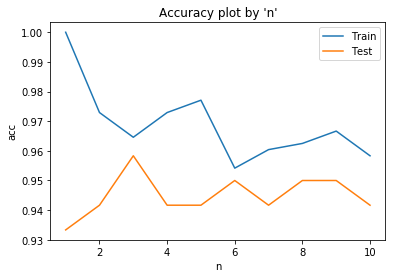

In [102]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()
plt.xlabel('n')
plt.ylabel('acc')
plt.title("Accuracy plot by 'n'")
plt.show()